<a href="https://colab.research.google.com/github/tanyachopra08/102116069-SESS-LE1/blob/main/102116069_tanyachopra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tanya Chopra
102116069
4CS11
Email: tchopra1_be21@thapar.edu
SESS_LE1

In [ ]:
##Consider the paper: <https://arxiv.org/abs/1804.03209>
##  1. Read and summarise the paper in about 50 words.
##  2. Download the dataset in the paper, statistically analyse and
##   describe it, so that it may be useful for posterity. (Include code
## snippets in your .ipynb file to evidence your analysis.)
##  3. Train a classifier so that you are able to distinguish the commands
##     in the dataset.
##  4. Report the performance results using standard benchmarks.
##  5. Record about 30 samples of each command in your voice and create a
##     new dataset (including a new user id for yourself).  You may use a
##     timer on your computer to synchronise.
##  6. Fine tune your classifier to perform on your voice.
##  7. Report the results.

In [ ]:
##The paper introduces the Speech Commands dataset, designed to advance
##keyword spotting systems by providing a standardized dataset of spoken words. This dataset allows
##researchers to build and test small models for detecting specific words amidst background noise.
##Released under the Creative Commons BY 4.0 license, it aims to support reproducible research and
##comparisons in keyword spotting, addressing the need for accessible and specialized datasets
##beyond traditional speech recognition resources.

In [ ]:
import os
import tensorflow as tf
import numpy as np
import seaborn as sns
import pathlib
from IPython import display
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [5]:
!pip install pydub

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

# Load the dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True, split=['train[:80%]', 'train[80%:]', 'test'], shuffle_files=True)

# Extract train, validation, and test datasets
train_dataset, validation_dataset, test_dataset = dataset

# Print dataset info
print(info)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/85511 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.L3ZM3J_0.0.3/speech_commands-train.tfrecord*...…

Generating validation examples...:   0%|          | 0/10102 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.L3ZM3J_0.0.3/speech_commands-validation.tfrecor…

Generating test examples...:   0%|          | 0/4890 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.L3ZM3J_0.0.3/speech_commands-test.tfrecord*...:…

Dataset speech_commands downloaded and prepared to /root/tensorflow_datasets/speech_commands/0.0.3. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='speech_commands',
    full_name='speech_commands/0.0.3',
    description="""
    An audio dataset of spoken words designed to help train and evaluate keyword
    spotting systems. Its primary goal is to provide a way to build and test small
    models that detect when a single word is spoken, from a set of ten target words,
    with as few false positives as possible from background noise or unrelated
    speech. Note that in the train and validation set, the label "unknown" is much
    more prevalent than the labels of the target words or background noise. One
    difference from the release version is the handling of silent segments. While in
    the test set the silence segments are regular 1 second files, in the training
    they are provided as long segments under "background_noise" folder. Here we
    split the

Training set: 1000 samples (sampled)
Validation set: 1000 samples (sampled)
Test set: 1000 samples (sampled)

Training set label distribution (sampled):
down: 37
go: 51
left: 27
no: 35
off: 43
on: 26
right: 31
stop: 41
up: 36
yes: 34
_silence_: 7
_unknown_: 632

Validation set label distribution (sampled):
down: 41
go: 44
left: 38
no: 32
off: 41
on: 29
right: 35
stop: 42
up: 27
yes: 38
_silence_: 10
_unknown_: 623

Test set label distribution (sampled):
down: 92
go: 90
left: 83
no: 89
off: 71
on: 83
right: 75
stop: 80
up: 83
yes: 91
_silence_: 79
_unknown_: 84


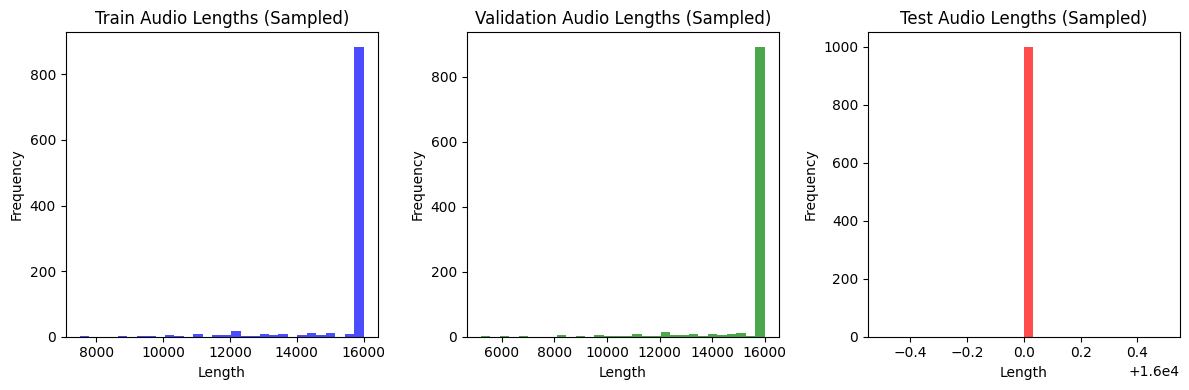

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Function to compute statistics using a sample of the dataset
def compute_statistics(dataset, sample_size=1000):
    num_samples = 0
    labels = []
    audio_lengths = []

    # Create a sample of the dataset
    dataset_sample = dataset.take(sample_size)

    # Iterate through the sample
    for audio, label in dataset_sample:
        num_samples += 1
        labels.append(label.numpy())
        audio_lengths.append(tf.shape(audio)[0].numpy())

    num_samples = np.array(num_samples)
    labels = np.array(labels)
    audio_lengths = np.array(audio_lengths)

    return num_samples, labels, audio_lengths

# Compute statistics for each dataset split using sampling
train_stats = compute_statistics(train_dataset)
val_stats = compute_statistics(validation_dataset)
test_stats = compute_statistics(test_dataset)

# Print basic statistics
print(f"Training set: {train_stats[0]} samples (sampled)")
print(f"Validation set: {val_stats[0]} samples (sampled)")
print(f"Test set: {test_stats[0]} samples (sampled)")

# Print label distribution
label_names = np.array(info.features['label'].names)
train_label_counts = np.bincount(train_stats[1])
val_label_counts = np.bincount(val_stats[1])
test_label_counts = np.bincount(test_stats[1])

print("\nTraining set label distribution (sampled):")
for i, count in enumerate(train_label_counts):
    print(f"{label_names[i]}: {count}")

print("\nValidation set label distribution (sampled):")
for i, count in enumerate(val_label_counts):
    print(f"{label_names[i]}: {count}")

print("\nTest set label distribution (sampled):")
for i, count in enumerate(test_label_counts):
    print(f"{label_names[i]}: {count}")

# Plot audio length distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(train_stats[2], bins=30, color='blue', alpha=0.7)
plt.title('Train Audio Lengths (Sampled)')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(val_stats[2], bins=30, color='green', alpha=0.7)
plt.title('Validation Audio Lengths (Sampled)')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(test_stats[2], bins=30, color='red', alpha=0.7)
plt.title('Test Audio Lengths (Sampled)')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [8]:
label_names = np.array(info.features['label'].names)
print("Label names:", label_names)

Label names: ['down' 'go' 'left' 'no' 'off' 'on' 'right' 'stop' 'up' 'yes' '_silence_'
 '_unknown_']


In [9]:
for example, label in train_dataset.take(1):
    print(f'Example shape: {example.shape}')
    print(f'Label shape: {label.shape}')

Example shape: (16000,)
Label shape: ()


In [10]:

import tensorflow as tf
import tensorflow_datasets as tfds

# Define preprocessing functions
def preprocess_audio(audio, target_length=16000):
    audio = tf.cast(audio, tf.float32) / 32768.0  # Normalize
    audio_length = tf.shape(audio)[0]

    # Calculate padding size
    pad_size = tf.maximum(target_length - audio_length, 0)

    # Pad or slice the audio
    audio = tf.cond(
        pad_size > 0,
        lambda: tf.pad(audio, [[0, pad_size]]),  # Pad if shorter
        lambda: audio[:target_length]  # Slice if longer
    )
    return audio

def preprocess(example, label):
    audio = preprocess_audio(example)
    audio = tf.expand_dims(audio, axis=-1)  # Add channel dimension
    return audio, label


# Apply preprocessing
train_data = (train_dataset
              .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
              .cache()
              .shuffle(1000)
              .batch(32)
              .prefetch(tf.data.AUTOTUNE))

val_data = (validation_dataset
            .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            .batch(32)
            .prefetch(tf.data.AUTOTUNE))

test_data = (test_dataset
             .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
             .batch(32)
             .prefetch(tf.data.AUTOTUNE))

In [11]:
class_names = info.features['label'].names
print("Class Names:")
for i, name in enumerate(class_names):
    print(f"Label {i}: {name}")

Class Names:
Label 0: down
Label 1: go
Label 2: left
Label 3: no
Label 4: off
Label 5: on
Label 6: right
Label 7: stop
Label 8: up
Label 9: yes
Label 10: _silence_
Label 11: _unknown_


In [12]:
# Define the mapping of label indices to class names
label_names = {
    0: 'down',
    1: 'go',
    2: 'left',
    3: 'no',
    4: 'off',
    5: 'on',
    6: 'right',
    7: 'stop',
    8: 'up',
    9: 'yes',
    10: '_silence_',
    11: '_unknown_'
}

In [13]:
num_labels = len(label_names)
num_labels

12

In [14]:
import tensorflow as tf

# Load your dataset (assuming it's a TensorFlow dataset)
# train_data = tf.data.Dataset.from_tensor_slices((audio_data, labels))
# For demonstration, we'll assume train_data is already defined

# Function to extract a few examples from the dataset
def get_examples(dataset, num_examples=3):
    example_audios = []
    example_labels = []

    for audio, label in dataset.take(num_examples):
        example_audios.append(audio.numpy())  # Convert Tensor to numpy array
        example_labels.append(label.numpy())

    return example_audios, example_labels

# Get a few examples from the dataset
example_audios, example_labels = get_examples(train_data, num_examples=3)

# Print the shapes of the examples to verify
for i in range(len(example_audios)):
    print(f"Example {i}:")
    print("Audio shape:", example_audios[i].shape)
    print("Label:", example_labels[i])

Example 0:
Audio shape: (32, 16000, 1)
Label: [11  7 11  7  6 11  4  4  2  4 11 11 11 11 11 11  2 11 11 11  9  3  5 11
 11  4  7  6 11 11 11 11]
Example 1:
Audio shape: (32, 16000, 1)
Label: [11  3 11  9  4 11 11 11 11 11  8  6 11 11 11 11  2  1 11 11 11  2 11  8
  9 11 11 10 11 11  4 11]
Example 2:
Audio shape: (32, 16000, 1)
Label: [11 11  4 11 11 11 11 11 11 11 11 11 11  7 11  9 11 11 11 11 11  2  3  1
 11  9  7 11 11 11 11 10]


Example 0:
Audio shape: (32, 16000, 1)
Label: [11  7 11  7  6 11  4  4  2  4 11 11 11 11 11 11  2 11 11 11  9  3  5 11
 11  4  7  6 11 11 11 11]
Audio playback:


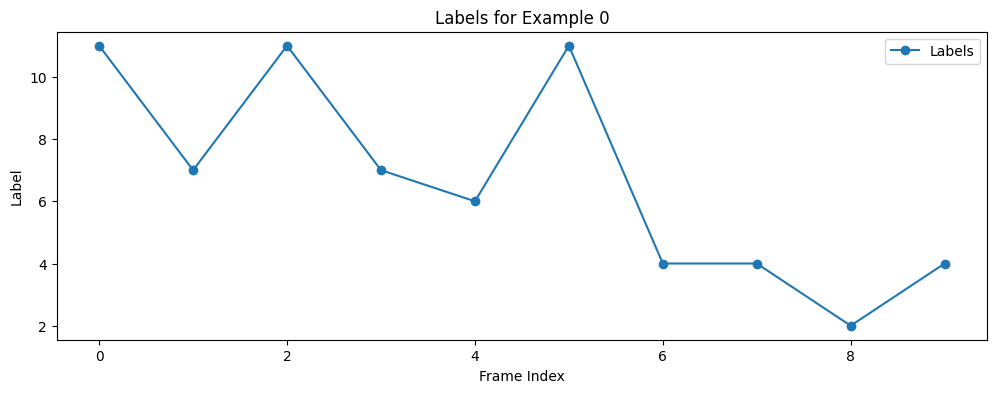

Example 1:
Audio shape: (32, 16000, 1)
Label: [11  3 11  9  4 11 11 11 11 11  8  6 11 11 11 11  2  1 11 11 11  2 11  8
  9 11 11 10 11 11  4 11]
Audio playback:


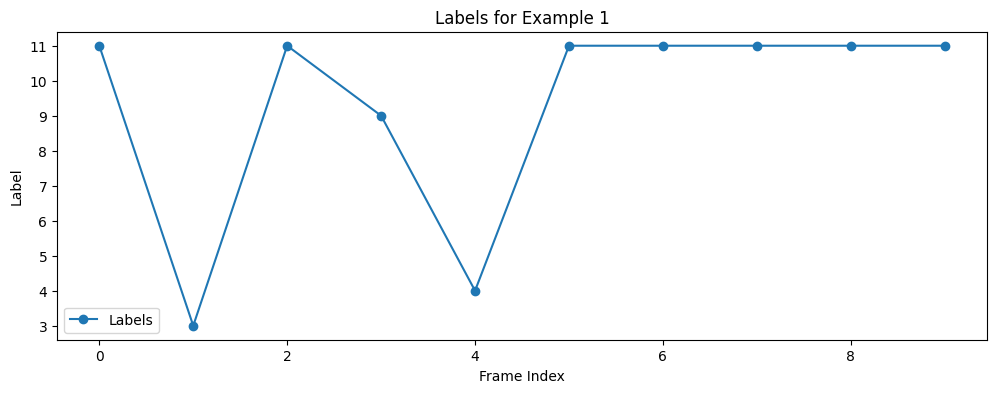

Example 2:
Audio shape: (32, 16000, 1)
Label: [11 11  4 11 11 11 11 11 11 11 11 11 11  7 11  9 11 11 11 11 11  2  3  1
 11  9  7 11 11 11 11 10]
Audio playback:


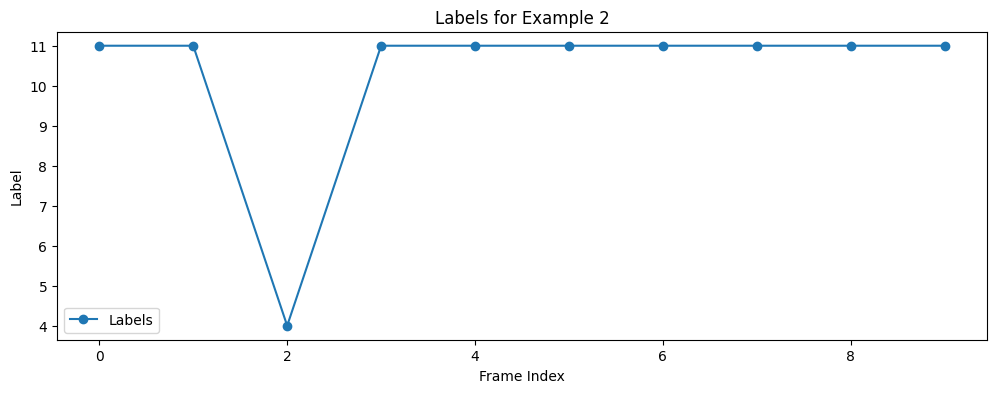

In [15]:
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt

def get_scalar_label(label_array):
    """Extract scalar values from label array."""
    if isinstance(label_array, np.ndarray):
        if label_array.size == 1:
            return label_array.item()
        else:
            return label_array
    else:
        return label_array

def display_example(example_index):
    # Assuming example_audios and example_labels are lists or arrays of examples
    audio = example_audios[example_index]
    labels = example_labels[example_index]

    # Print waveform shape and labels
    print(f"Example {example_index}:")
    print("Audio shape:", audio.shape)
    print("Label:", labels)

    # Display audio for the example
    print('Audio playback:')
    display.display(display.Audio(audio[0], rate=16000))  # Adjust index if needed

    # Plot the first few frames and their labels
    num_frames_to_plot = min(len(labels), 10)  # Adjust as needed
    plt.figure(figsize=(12, 4))
    plt.plot(range(num_frames_to_plot), labels[:num_frames_to_plot], 'o-', label='Labels')
    plt.xlabel('Frame Index')
    plt.ylabel('Label')
    plt.title(f'Labels for Example {example_index}')
    plt.legend()
    plt.show()

# Display the first 3 examples
for i in range(3):
    display_example(i)


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape based on your audio data
input_shape = (16000, 1)  # (length, channels)
num_labels = len(label_names)  # Number of unique labels

# Define the model
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels, activation='softmax')  # Use softmax for multi-class classification
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=3,
                    verbose=1)



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 16000, 64)           │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,788 (233.55 KB)

 Trainable params: 59,788 (233.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1904s 890ms/step - accuracy: 0.6321 - loss: 1.5890 - val_accuracy: 0.6316 - val_loss: 1.5280
Epoch 2/3
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1857s 868ms/step - accuracy: 0.6346 - loss: 1.5352 - val_accuracy: 0.6316 - val_loss: 1.5312
Epoch 3/3
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1844s 862ms/step - accuracy: 0.6339 - loss: 1.5327 - val_accuracy: 0.6316 - val_loss: 1.5270


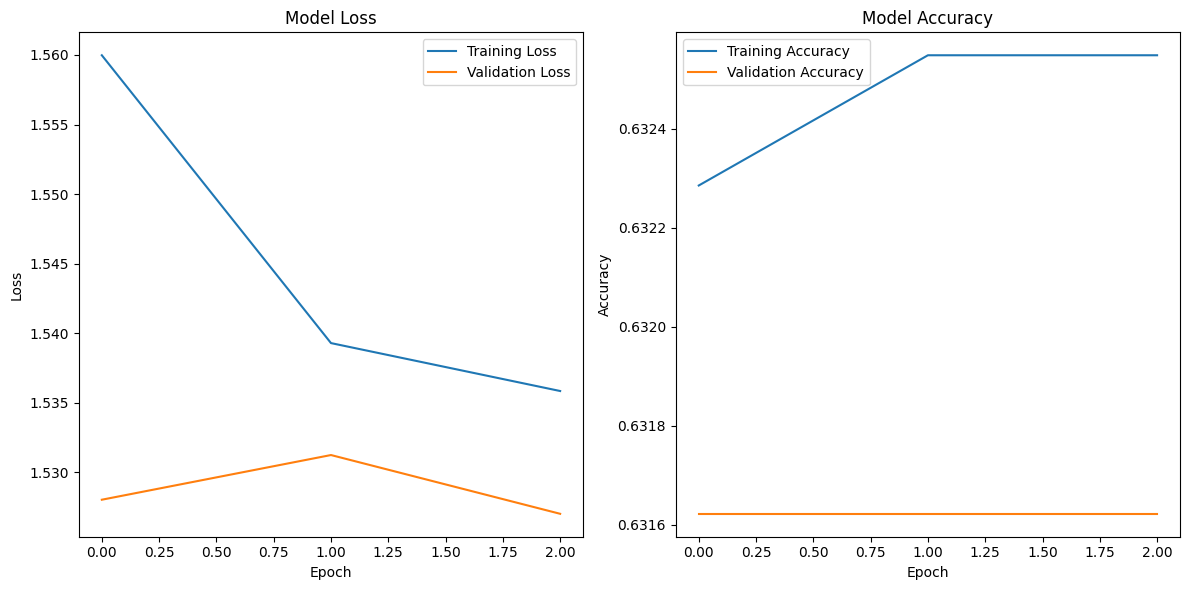

In [20]:
# Assuming 'history' is the object returned by model.fit
history_dict = history.history

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save('/content/my_trained_model.h5')
loaded_model = tf.keras.models.load_model('/content/my_trained_model.h5')

In [25]:
import zipfile
import os

# Define paths
zip_path = '/content/speechcommands.zip'  # Update if the file has a different name
extract_dir = '/content/speechcommands_extracted'

# Create the extraction directory
os.makedirs(extract_dir, exist_ok=True)

# Unzip and extract relevant files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        # Skip unwanted directories
        if member.startswith('__MACOSX') or member.endswith('.DS_Store'):
            continue
        # Extract file
        zip_ref.extract(member, extract_dir)


In [27]:
import numpy as np
import os
import librosa
import tensorflow as tf

def load_audio(file_path, target_length=16000):
    audio, _ = librosa.load(file_path, sr=16000)
    if len(audio) > target_length:
        audio = audio[:target_length]
    elif len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)))
    return audio

def create_dataset(directory, labels, target_length=16000):
    data = []
    targets = []
    for label in labels:
        label_dir = os.path.join(directory, 'speechcommands', label)
        if not os.path.exists(label_dir):
            print(f"Directory not found: {label_dir}")
            continue
        for file in os.listdir(label_dir):
            if file.endswith(".wav"):
                file_path = os.path.join(label_dir, file)
                audio = load_audio(file_path, target_length)
                data.append(audio)
                targets.append(labels.index(label))
    return np.array(data), np.array(targets)

# Define your labels (commands)
labels = ['right', 'up', 'down', 'go', 'left', 'on', 'off', 'no', 'yes', 'si', 'un', 'stop']
extract_dir = '/content/speechcommands_extracted'

# Load and preprocess the data
train_data, train_labels = create_dataset(extract_dir, labels)

# Convert to TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Load your pre-trained model
model_path = '/content/my_trained_model.h5'  # Update with the correct path
model = tf.keras.models.load_model(model_path)

# Recompile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history = model.fit(train_dataset,
                    epochs=5,  # Adjust epochs as needed
                    verbose=1)


In [ ]:

test_data, test_labels = create_dataset(test_dir, labels)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy:.4f}')
